In [10]:
import os
import face_recognition
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
from PIL import Image

['me_2.jpg', 'Micky_Gwangsoo.jpeg', 'Kim_Jong_KOOK_3.jpeg', 'Kim_Jong_KOOK_2.jpeg', 'me_3.jpg', 'Leonardo_2.jpeg', 'Kim_Jong_KOOK_1.jpeg', 'Leonardo_1.jpeg', 'Jeong_Jong_Hyeon.jpeg', 'me_1.jpg']


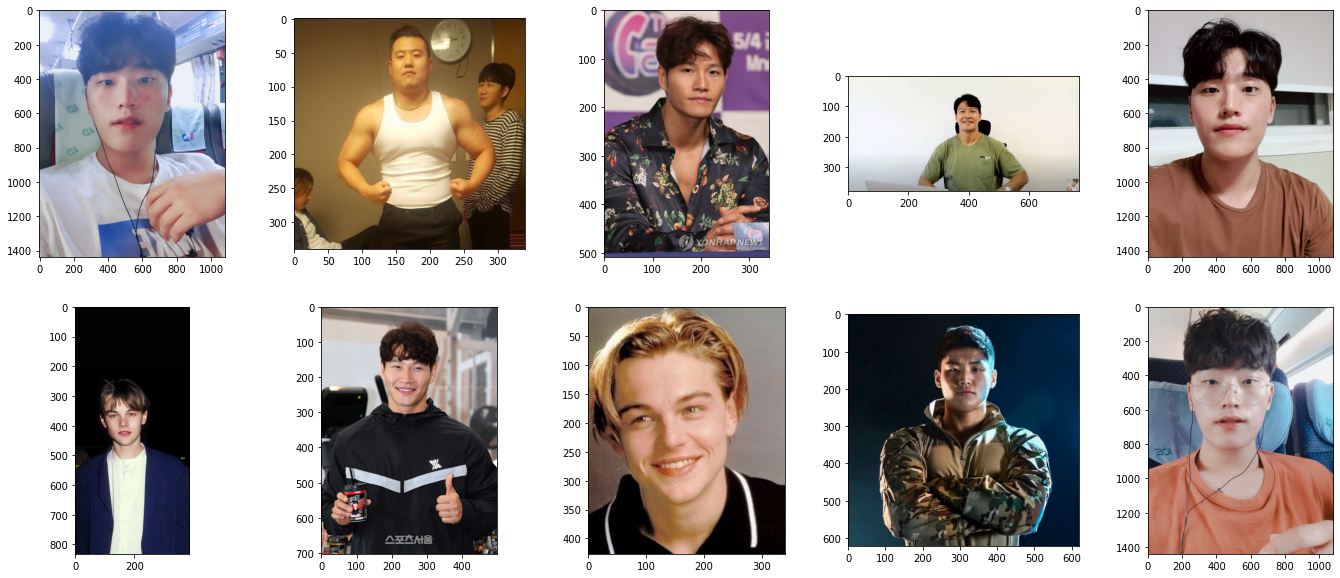

In [86]:
# 이미지 모으기

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/project_images'
file_list = os.listdir(dir_path)

print(file_list)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(24,10))

for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path + '/' + only[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

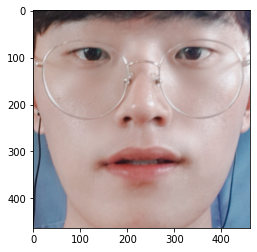

In [87]:
# 이미지 crop 함수

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a,b,c,d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
    return cropped_face

image_path = os.getenv('HOME')+'/aiffel/face_embedding/project_images/me_1.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [88]:
# Embedding

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)
embedding

[array([-6.70168698e-02,  1.37172937e-01,  4.27542925e-02, -9.01654363e-02,
        -1.34353682e-01,  8.61394871e-03, -1.04236089e-01, -8.97875503e-02,
         1.52240410e-01, -1.04175337e-01,  2.20769584e-01, -2.77014133e-02,
        -2.03463316e-01, -1.17888324e-01, -4.69812974e-02,  2.07259879e-01,
        -1.74041137e-01, -1.86049789e-01,  1.23270154e-02,  1.58528145e-03,
         1.26366660e-01,  2.74076574e-02, -6.78023882e-03,  1.32605666e-02,
        -1.18306875e-01, -2.87135869e-01, -1.03879035e-01, -1.17849577e-02,
        -2.80949268e-02, -8.37864205e-02, -1.22979665e-02,  4.30361480e-02,
        -2.11002499e-01, -3.64306569e-02,  5.31954095e-02,  1.23455405e-01,
        -1.38368262e-02, -7.26015046e-02,  1.42517611e-01, -1.28531829e-04,
        -2.12903023e-01,  8.93990919e-02,  4.28893529e-02,  1.95987090e-01,
         1.48651406e-01,  1.03153894e-02,  3.00649665e-02, -1.93471789e-01,
         9.29557458e-02, -1.24345265e-01,  5.34925461e-02,  1.97591335e-01,
         7.0

In [89]:
# embedding dict

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            
    return embedding_dict

In [90]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['me_3']

array([-1.16064116e-01,  1.35357544e-01,  4.06834744e-02, -7.54272789e-02,
       -1.49027005e-01, -2.73727346e-02, -1.39727473e-01, -1.07999004e-01,
        8.47843289e-02, -9.03894380e-02,  2.07261696e-01, -4.80623208e-02,
       -1.79287285e-01, -9.16777402e-02, -4.13206480e-02,  2.03813404e-01,
       -1.46853715e-01, -1.63150415e-01, -1.69116016e-02,  2.59554014e-04,
        1.52350709e-01,  5.86513914e-02,  7.48554477e-03,  4.65147570e-02,
       -1.44231007e-01, -2.83691853e-01, -1.06299937e-01, -4.15000841e-02,
        3.77267692e-03, -6.37034327e-02, -4.25860584e-02, -2.52313167e-02,
       -2.04070166e-01, -3.96741778e-02,  6.99457675e-02,  1.09915443e-01,
       -9.88249015e-03, -1.05497874e-01,  1.41383111e-01,  3.52700464e-02,
       -2.49560639e-01,  1.02221884e-01,  4.58828732e-02,  2.14777440e-01,
        1.62423059e-01,  2.59132553e-02,  5.38930073e-02, -1.75692901e-01,
        1.19635843e-01, -1.01294719e-01,  6.13375977e-02,  1.69607013e-01,
        7.23955408e-02,  

In [91]:
# 얼굴 사이의 거리 측정

import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1] - embedding_dict[name2], ord=2)

In [92]:
get_distance('me_1', 'me_2')

0.29840602806505256

In [96]:
get_distance('me_1', 'Kim_Jong_KOOK_1')

0.49971362003731473

In [97]:
get_distance('me_1', 'Leonardo_1')

0.8325952145729789

In [98]:
# 거리가 가까운 순으로

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1,name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('me_1')

In [104]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('me_1',
  array([-0.08611847,  0.11263186,  0.05402447, -0.04643229, -0.10538483,
         -0.0204985 , -0.11019345, -0.05880621,  0.08405089, -0.0823893 ,
          0.19322117, -0.0359483 , -0.20628753, -0.11504798, -0.0560999 ,
          0.19938239, -0.14100406, -0.14400336, -0.01879659, -0.02929275,
          0.11665831,  0.08252557,  0.00805271, -0.02044929, -0.11614848,
         -0.27484763, -0.08042818, -0.0563857 , -0.01633029, -0.03662624,
         -0.02575409,  0.03237636, -0.16823804, -0.03442322,  0.06295098,
          0.11045952, -0.03476244, -0.10515264,  0.16228297, -0.02440634,
         -0.21698482,  0.06858107,  0.05684522,  0.23203343,  0.16744956,
         -0.0224219 ,  0.07352893, -0.14845878,  0.12086497, -0.12278228,
          0.04055042,  0.18898202,  0.0606521 ,  0.07652052,  0.03374622,
         -0.08487817,  0.0604801 ,  0.13356291, -0.0597829 , -0.01218711,
          0.10863204, -0.02719331,  0.00502593, -0.12581602,  0.17025298,
          0.0019249 , -0.103

In [105]:
def get_nearest_face(name, top=8):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x: sort_key_func(x[0]))
    
    for i in range(top+1):
        if i==0:
            continue
        if sorted_faces[i]:
            print('{} : {}, {}'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [106]:
get_nearest_face('me_1')

1 : me_2, 0.29840602806505256
2 : me_3, 0.33784050169705543
3 : Kim_Jong_KOOK_3, 0.46768878339828696
4 : Kim_Jong_KOOK_1, 0.49971362003731473
5 : Kim_Jong_KOOK_2, 0.5183139860800148
6 : Micky_Gwangsoo, 0.5960227255600001
7 : Leonardo_2, 0.7764830040212763
8 : Leonardo_1, 0.8325952145729789
